# Project: Investigate a Dataset - TMDb Movie Data<a href="#Project:-Investigate-a-Dataset---TMDb-Movie-Data" class="anchor-link">¶</a>

## Table of Contents<a href="#Table-of-Contents" class="anchor-link">¶</a>

[Introduction](#intro)

[Data Wrangling](#wrangling)

[Exploratory Data Analysis](#eda)

[Conclusions](#conclusions)

[Appendix](#appendix)

<span id="intro"></span>

## Introduction<a href="#Introduction" class="anchor-link">¶</a>

### Dataset Description and Investigation Objective<a href="#Dataset-Description-and-Investigation-Objective" class="anchor-link">¶</a>

> This data set contains information about 10,000 movies collected from
> The Movie Database (TMDb), including user ratings and revenue.  
> Our primary objective for this analysis to check which parameters
> affect the revenue of a movie. We will also try to check the main
> factors contributing to the popularity of a movie.

#### **Dataset Column Explanation**:<a href="#Dataset-Column-Explanation:" class="anchor-link">¶</a>

1.  Movie ID for TMDb.
2.  Movie ID for IMDB.
3.  The popularity score which is a metric specific to TMDb. This metric
    is calculated *for movies* based on:
    1.  Number of votes per day
    2.  Number of views per day
    3.  Users who marked it as "favourite" for the day
    4.  User who added it to "watchlist" for the day
    5.  The movie release date
    6.  The total number of votes
    7.  The results from the previous day. More on this parameter in the
        following
        [link](https://developers.themoviedb.org/3/getting-started/popularity)
4.  The budget
5.  The revenue
6.  The original title of the movie
7.  The cast where there are different cast members
8.  The homepage of the movie
9.  The director and there might be more than 1 director
10. The tagline
11. Keywords
12. A quick overview of the movie
13. Runtime in minutes
14. Genres
15. Production companies
16. Vote count
17. Vote Average
18. Release date
19. Budget adjusted for inflation in terms of 2010 USD.
20. Revenue adjusted for inflation in terms of 2010 USD.

*During the analysis, 4 new columns will be added:*

1.  Release month
2.  Release season
3.  Gain based on the inflation
4.  Public reception, which is just a column grouping certain ranges of
    vote average, as it will be shown below.

In [1]:
    # Use this cell to set up import statements for all of the packages that you
    #   plan to use.
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import time
    %matplotlib inline
    start = time.time()

In [2]:
    # Upgrade pandas to use dataframe.explode() function. 
    # not needed in my case
    #!pip install --upgrade pandas==0.25.0

<span id="wrangling"></span>

## Data Wrangling and Cleaning<a href="#Data-Wrangling-and-Cleaning" class="anchor-link">¶</a>

> In the **data wrangling** stage, we will check the dataframe's shape
> in general. We will check the columns and remove unecessary columns
> and adjust the data types to facilitate the analysis.  
> **Data cleaning** focuses on removing inaccurate data from the dataset
> in order not to affect the analysis.

In [3]:
    # Load your data and print out a few lines. Perform operations to inspect data
    #   types and look for instances of missing or possibly errant data.
    df=pd.read_csv("tmdb-movies.csv")
    df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


The code above confirmed that some columns (mainly genres) can have more
than one value separated by a tube "\|". This will be tackled when we
will use these columns as independent variables in our analysis.

We first want to check for the duplicates and drop them.

In [4]:
    df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
    df.shape

(10866, 21)

In [6]:
    df.drop_duplicates(inplace=True)
    df.shape

(10865, 21)

The `shape` function is used to confirm that the duplicate was dropped.

We will now drop all columns that will be irrelevant in our analysis.
These columns will be: movie ID for TMDb, movie ID for IMDB, movie
homepage link, tagline, keywords and overview.

In [7]:
    df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
    df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
    df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

We will now check all column types so we can see if we need any change
in any column data types.

In [9]:
    df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The only type that will need change is `release_date` that will need to
be changed to datetime format.

In [10]:
    df['release_date']= pd.to_datetime(df['release_date'])
    df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

The `dtypes` function is used to confirm that the type of `release_date`
was changed.

We will now add a new column for the release month. This will help us define release season for each movie.
to be able to create the new column `release_season`.

In [11]:
    df['release_month']=df['release_date'].dt.month
    def label_season (row):
       if 2<row['release_month']<6:
          return 'Spring'
       if 5<row['release_month']<9:
          return 'Summer'
       if 8<row['release_month']<12:
          return 'Autumn'
       if row['release_month'] == 12 or row['release_month']<3:
          return 'Winter'
       return 'Other'
    df['release_season'] = df.apply (lambda row: label_season(row), axis=1)
    df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Spring
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Spring


We will now add a new column called `gain_adj`. These column will be the
difference between `revenue_adj` and `budget_adj`. This will help us
also check the gain from each movie and not just the revenue. We have
also used the adjusted the value for inflation to have a just
comparison.

In [12]:
    df['gain_adj']=df['revenue_adj']-df['budget_adj']
    df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Spring,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Spring,1.704191e+08


We will now check the NaN values for each column. Check each column on
its own will help us figure out what to do with all NaN values in each
column.

In [13]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

 We can see that there are null values in `cast`, `director`, `genres`
and `production_companies`.  
This does not 100% mean missed data (i.e, documentaries and short
animation movies may have no cast).  
However, since the missed data above will not have a strong effect on
the analysis, we will not perform any `df.dropna()` or `df.fillna()` in
our main dataframe.  
This will be done only in using each column of the above as an
independant variable in order to have the most possible accurate data.

In [14]:
    df[df['cast'].isna()][0:3]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,2015-11-25,47,6.9,2015,0.0,0.0,11,Autumn,0.0
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,2015-10-09,37,8.2,2015,0.0,0.0,10,Autumn,0.0
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,2015-01-24,19,7.8,2015,0.0,0.0,1,Winter,0.0


In [15]:
    df[df['director'].isna()][0:3]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,2015-01-23,14,6.6,2015,0.0,0.0,1,Winter,0.0
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,2015-08-10,12,7.5,2015,0.0,0.0,8,Summer,0.0
556,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,2015-01-24,14,6.5,2015,0.0,0.0,1,Winter,0.0


In [16]:
    df[df['genres'].isna()][0:3]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,2015-10-29,21,6.1,2015,0.0,0.0,10,Autumn,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015,0.0,0.0,10,Autumn,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,2014-10-03,13,6.8,2014,0.0,0.0,10,Autumn,0.0


In [17]:
    df[df['production_companies'].isna()][0:3]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,2015-01-24,36,7.8,2015,0.0,0.0,1,Winter,0.0
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,2015-11-27,10,7.6,2015,0.0,0.0,11,Autumn,0.0
295,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,2015-11-26,12,6.3,2015,0.0,0.0,11,Autumn,0.0


In [18]:
    df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,gain_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,6.827612,3.381911e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,3.441764,1.252194e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000,-4.139124e+08
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,10.000000,1.293091e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000,2.750137e+09


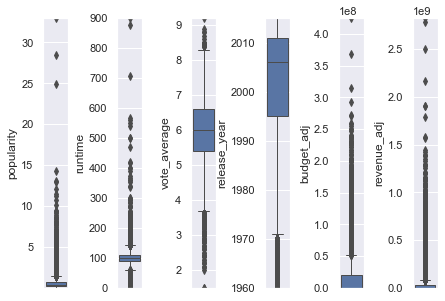

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
mean,0.646446,102.071790,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,0.935138,12.813260,3.430753e+07,1.446383e+08


In [79]:
    selection = [df.popularity, df.runtime, df.vote_average, df.release_year, df.budget_adj, df.revenue_adj]
    fig, axes = plt.subplots(1, len(selection))
    for i, col in enumerate(selection):
        ax = sns.boxplot(y=col, ax=axes.flatten()[i], linewidth=1)
        ax.set_ylim(col.min(), col.max())
    fig.tight_layout(pad=0.05)
    plt.show()
    df[['popularity','runtime','vote_average','release_year','budget_adj','revenue_adj']].describe().loc[['mean','std']]

   

The above showed us some other challenges with the data.  
Some movies have a **runtime** of 0 minutes.  
This is surely a data entry mistake. We will just need to drop these
movies when working with runtime.

In [20]:
    df[df['runtime']==0][0:3]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.0,12,Winter,0.0
334,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.0,0.0,11,Autumn,0.0
410,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,NaN,2015-01-01,15,5.6,2015,0.0,0.0,1,Winter,0.0


We also noticed that some movies have a **revenue** of USD 0.  
This may be caused by a data entry mistake. Maybe a movie did really
have no revenue (highly unlikely) !!  
It also may seem acceptable if the movies were only shown on streaming
platforms like Netflix.  
Some movies have a **budget** of USD 0.  
This is probably a data entry mistake or missing data so we will need to
drop such movies from our analysis when focusing on budget spend.

In [21]:
    df[df['budget']==0][0:3]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07,6,Summer,2.700677e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07,9,Autumn,2.056620e+07
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04,4,Spring,4.222338e+04


In [22]:
    df[df['revenue']==0][0:3]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0,1,Winter,-2.759999e+07
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0,5,Spring,-1.839999e+07
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0,6,Summer,0.000000e+00


### Data Wrangling Summary<a href="#Data-Wrangling-Summary" class="anchor-link">¶</a>

We were able to:

1.  Remove 1 duplicate row
2.  Remove 5 columns which have no added value in our analysis
3.  Changed data type of release date
4.  Add new columns for release month and season
5.  Add new columns for adjusted gain for each movie
6.  Found NaN values in cast, director, genres and production companies.
    A decision was taken not to drop these rows.
7.  Discovered wrong data in runtime and budget which will need to be
    addressed when checking each independant variable vs. our two
    dependant variables (**popularity and revenue**).

Let us first check the most successfull movies. What are the most
popular movies in our list ?

In [23]:
    df.sort_values(by='popularity', ascending=False)[:9][['popularity','original_title','revenue_adj','gain_adj']]

,popularity,original_title,revenue_adj,gain_adj
0,32.985763,Jurassic World,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,3.481613e+08,2.101614e+08
629,24.949134,Interstellar,5.726906e+08,4.207106e+08
630,14.311205,Guardians of the Galaxy,7.122911e+08,5.557057e+08
2,13.112507,Insurgent,2.716190e+08,1.704191e+08
631,12.971027,Captain America: The Winter Soldier,6.583651e+08,5.017796e+08
1329,12.037933,Star Wars,2.789712e+09,2.750137e+09
632,11.422751,John Wick,7.252661e+07,5.410479e+07
3,11.173104,Star Wars: The Force Awakens,1.902723e+09,1.718723e+09


Let us know check the highest grossing movies.

In [24]:
    df.sort_values(by='revenue_adj', ascending=False)[:9][['popularity','original_title','revenue_adj','gain_adj']]

,popularity,original_title,revenue_adj,gain_adj
1386,9.432768,Avatar,2.827124e+09,2.586237e+09
1329,12.037933,Star Wars,2.789712e+09,2.750137e+09
5231,4.355219,Titanic,2.506406e+09,2.234714e+09
10594,2.010733,The Exorcist,2.167325e+09,2.128036e+09
9806,2.563191,Jaws,1.907006e+09,1.878643e+09
3,11.173104,Star Wars: The Force Awakens,1.902723e+09,1.718723e+09
8889,2.900556,E.T. the Extra-Terrestrial,1.791694e+09,1.767968e+09
8094,1.136610,The Net,1.583050e+09,1.551568e+09
10110,2.631987,One Hundred and One Dalmatians,1.574815e+09,1.545635e+09


We can see that only **2** movies, *Star Wars* and *Star Wars: The Force
Awakens* are on both top ten list.  
But is that really the case ?  
Do popular movies not gain the most money necessarily ?  
This is what we are trying to discover today.

> **What makes a movie *successful* ?**  
> **Is there a difference between a *popular* movie and a *high
> grossing* movie ?**

<span id="eda"></span>

## Exploratory Data Analysis<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

> Our approach to the EDA will be as follows:
>
> 1.  We will turn our focus to each independant variable (release
>     season, ) one at a time.  
>     We will see the effect of this independant variable on our 3
>     dependant variables: popularity, revenue adjusted to inflation and
>     gain adjusted to inflation. As explained before, we have selected
>     the values adjusted to inflation to have a fair comparison between
>     old and new movies. Including the gain and not just the revenue in
>     our analysis is to show the effect of the movie budget.
>     1.  Effect of release season
>     2.  Effect of release year
>     3.  Effect of average votes
>     4.  Effect of movie genres
>     5.  Effect of production companies
>     6.  Effect of movie budget
>     7.  Effect of movie runtime
> 2.  We will then validate if popular movies gain a lot of money or
>     not.

### Research Question 1 : Effect of Release Season<a href="#Research-Question-1-:-Effect-of-Release-Season" class="anchor-link">¶</a>

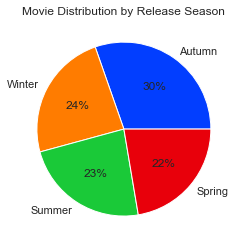

Autumn    3298
Winter    2595
Summer    2544
Spring    2428
Name: release_season, dtype: int64

In [80]:
    labels = df['release_season'].value_counts().index.tolist()
    data = df['release_season'].value_counts().values.tolist()
    colors = sns.color_palette('bright')[0:5]
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title('Movie Distribution by Release Season')
    plt.show()
    df['release_season'].value_counts()

We can see that most movies are in the autumn, followed by winter,
summer and finally spring.  
Does this mean anything considering the effect of release season on
movie success ?

In [26]:
    df.groupby(['release_season'])[['popularity','revenue_adj','gain_adj']].mean()

,popularity,revenue_adj,gain_adj
release_season,,,
Autumn,0.628777,3.878142e+07,2.394645e+07
Spring,0.652153,5.520146e+07,3.675394e+07
Summer,0.706000,6.754461e+07,4.630964e+07
Winter,0.605176,4.792310e+07,3.137531e+07


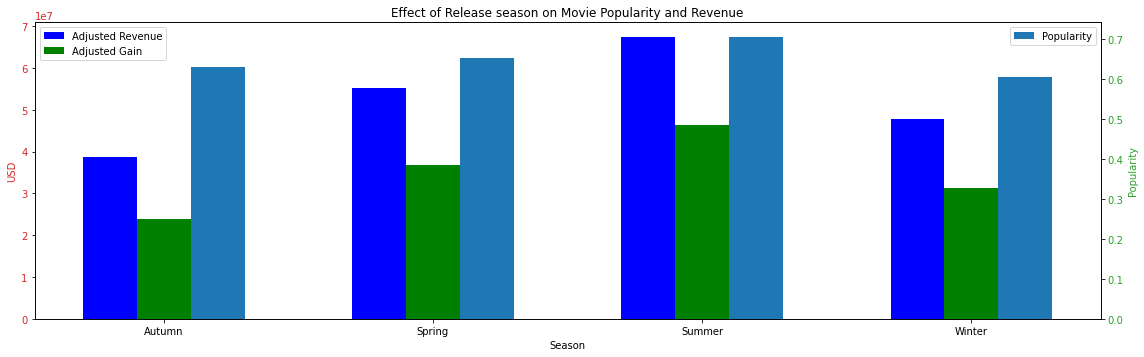

In [27]:
    df_season=df.groupby(['release_season'])[['popularity','revenue_adj','gain_adj']].mean()
    X_axis = np.arange(len(df_season.index))

    fig, ax1 = plt.subplots(figsize=(16, 5))
    color = 'tab:red'
    ax1.set_xlabel('Season')
    ax1.grid(False)
    #ax1.set_xticks([1,2,3,4], ['a','b','c','d'])
    ax1.set_ylabel('USD', color=color)
    ax1.bar(X_axis - 0.2, df.groupby(['release_season'])['revenue_adj'].mean(), 0.2, label = 'Adjusted Revenue', color = 'blue')
    ax1.bar(X_axis, df.groupby(['release_season'])['gain_adj'].mean(), 0.2, label = 'Adjusted Gain', color = 'green', tick_label=df_season.index.tolist())
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc= 'upper left')

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.grid(False)
    ax2.set_ylabel('Popularity', color=color)  # we already handled the x-label with ax1
    ax2.bar(X_axis + 0.2,df.groupby(['release_season'])['popularity'].mean() , 0.2, label = 'Popularity')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.legend()
    ax1.set_title('Effect of Release season on Movie Popularity and Revenue')
    plt.show()

The above shows us the effect of the release season.  
As some of us may guess, the hotest season for movie-goers is **SUMMER**.

This is the season where you usually have the highest revenues and highest gain from the movies.  
This is probably why the producers choose to release their best movies in the summer.

### Research Question 2 : Effect of Release Year<a href="#Research-Question-2--:-Effect-of-Release-Year" class="anchor-link">¶</a>

In [28]:
    df_release_year=df.groupby(['release_year']).mean()[['popularity','revenue_adj','gain_adj']]

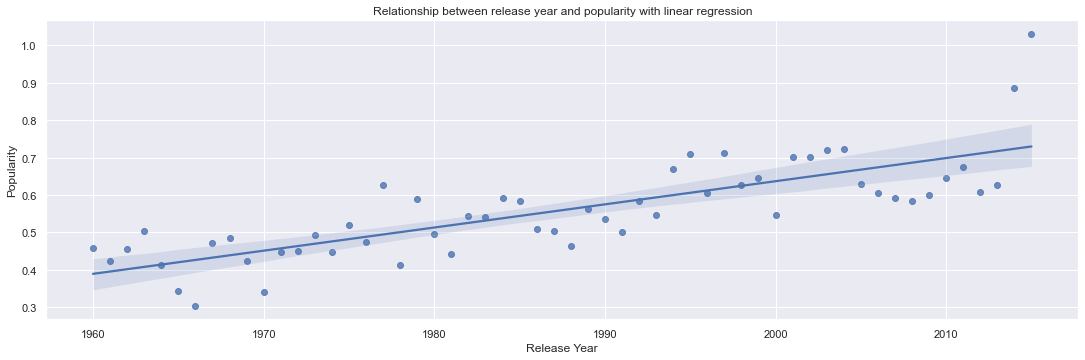

In [29]:
    sns.set_theme(color_codes=True)
    tips = sns.load_dataset("tips")
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.regplot(x=df_release_year.index, y=df_release_year.popularity, data=tips, ax=ax).set( xlabel = "Release Year", ylabel = "Popularity", title = 'Relationship between release year and popularity with linear regression');

From the linear regression model above, we can conclude that movies
became more popular with time.  
This may also be a false indication since release year is one of the
factors contributing to the calculation of the popularity.

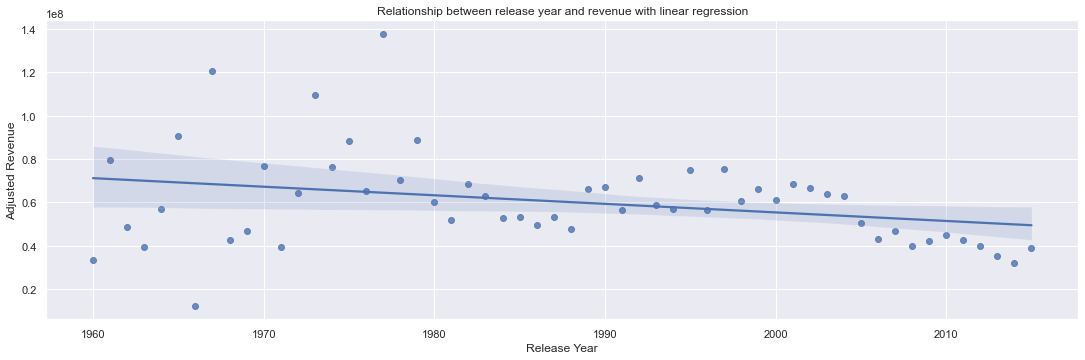

In [30]:
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.regplot(x=df_release_year.index, y=df_release_year.revenue_adj, data=tips, ax=ax).set( xlabel = "Release Year", ylabel = "Adjusted Revenue", title = 'Relationship between release year and revenue with linear regression');

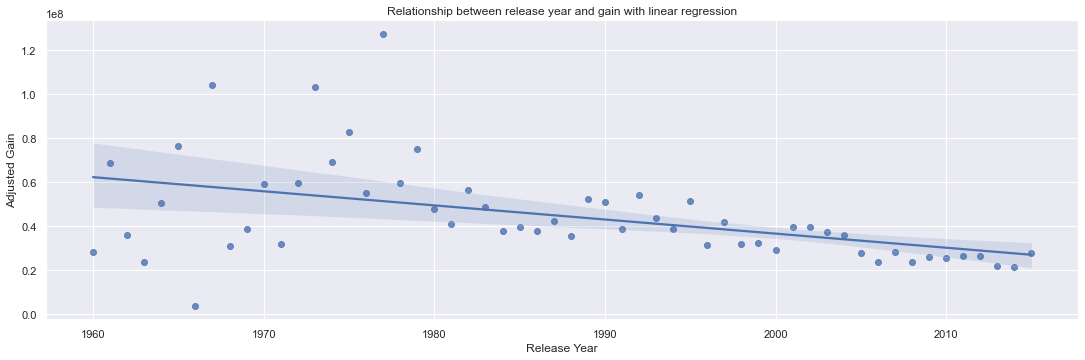

In [31]:
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.regplot(x=df_release_year.index, y=df_release_year.gain_adj, data=tips, ax=ax).set( xlabel = "Release Year", ylabel = "Adjusted Gain", title = 'Relationship between release year and gain with linear regression');

What is a complete surprise for me, the fact that the linear regression
model shows a decrease in the movies revenue and gain with time. This is
surprising for two reasons:

1.  This is the first time we see the popularity go in a different
    direction than the movie inflated revenue.
2.  We would assume that movies win more money with time, but we seem to
    forget the effect of **inflation**.

### Research Question 3 : Does the public taste go hand in hand with revenue or movie popularity ?<a href="#Research-Question-3--:-Does-the-public-taste-go-hand-in-hand-with-revenue-or-movie-popularity-?" class="anchor-link">¶</a>

To do this, we will have to divide the average votes into 4 main bins:

1.  Below average movies got an average vote from 0 to 3.
2.  Average vote from 3 to 5 got the below average verdict.
3.  Above average movies got an average vote between 5 and 7.
4.  Any movie that got an average vote above 7 are deemed to be
    successful movies.

In [32]:
    bin_edges = [0,3,5,7,10]
    bin_names=['Poor', 'Below Average', 'Above Average', 'Successful']
    df['public_reception']=pd.cut(df['vote_average'], bin_edges,labels=bin_names)
    df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj,public_reception
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09,Above Average
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Spring,2.101614e+08,Successful
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Spring,1.704191e+08,Above Average


In [33]:
    df.groupby(['public_reception']).mean()[['popularity','revenue_adj','gain_adj']]

,popularity,revenue_adj,gain_adj
public_reception,,,
Poor,0.210457,2.035811e+05,-1.517972e+06
Below Average,0.368497,9.734401e+06,3.462907e+05
Above Average,0.621855,5.104401e+07,3.213520e+07
Successful,1.160187,1.069336e+08,8.707359e+07


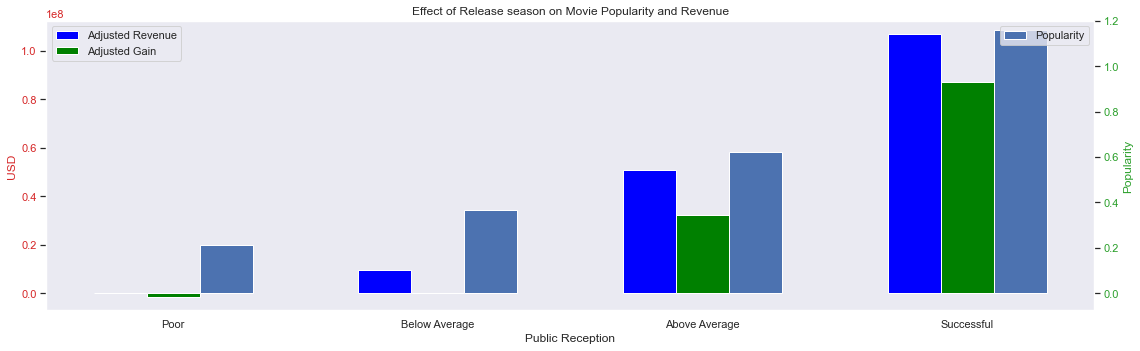

In [34]:
    df_reception=df.groupby(['public_reception']).mean()[['popularity','revenue_adj','gain_adj']]
    X_axis = np.arange(len(df_reception.index))

    fig, ax1 = plt.subplots(figsize=(16, 5))
    color = 'tab:red'
    ax1.set_xlabel('Public Reception')
    ax1.grid(False)
    ax1.set_ylabel('USD', color=color)
    ax1.bar(X_axis - 0.2, df.groupby(['public_reception'])['revenue_adj'].mean(), 0.2, label = 'Adjusted Revenue', color = 'blue')
    ax1.bar(X_axis, df.groupby(['public_reception'])['gain_adj'].mean(), 0.2, label = 'Adjusted Gain', color = 'green', tick_label=df_reception.index.tolist())
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc= 'upper left')

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.grid(False)
    ax2.set_ylabel('Popularity', color=color)  # we already handled the x-label with ax1
    ax2.bar(X_axis + 0.2,df.groupby(['public_reception'])['popularity'].mean() , 0.2, label = 'Popularity')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([-0.075,1.2])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.legend(loc= 'upper right')
    ax1.set_title('Effect of Release season on Movie Popularity and Revenue')
    plt.show()

This is comforting. The public reception affects the movie popularity (Duh !), but it also affect the revenue and the gain of the movies.  
Poor movies **lost** money as you can see in the grouped bar chart above.

### Research Question 4 : Does the movie genre affect its success ?<a href="#Research-Question-4--:-Does-the-movie-genre-affect-its-success-?" class="anchor-link">¶</a>

We have a small challenge in this independant variable. Movies can have more than 1 genre.  
To deal with this, we will use `df.explode` into a new column called `genres_lim`.

In [35]:
    df_genres=df.dropna(subset=['genres'])
    df_genres['genres_lim']=df_genres.genres.str.split("|")
    df_genres=df_genres.explode('genres_lim')
    df_genres.drop(['genres'], axis=1, inplace=True)
    df_genres.head(3)

C:\Temp/ipykernel_3628/1612582702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['genres_lim']=df_genres.genres.str.split("|")


,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj,public_reception,genres_lim
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09,Above Average,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09,Above Average,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09,Above Average,Science Fiction


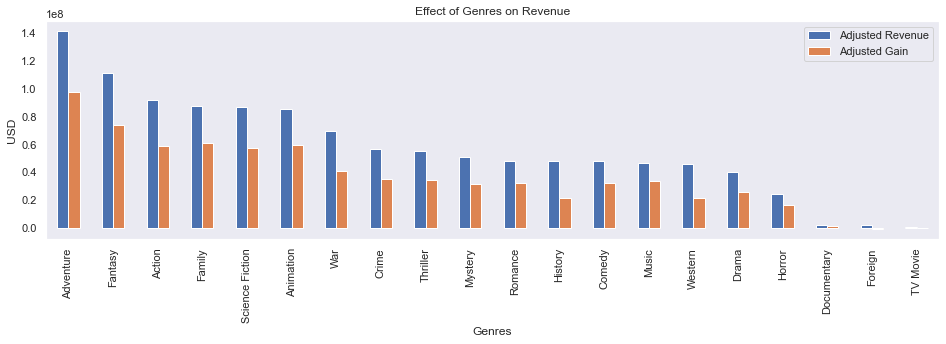

In [56]:
    df_genres_analysis=df_genres.groupby(['genres_lim']).mean()[['revenue_adj','gain_adj']].sort_values(by='revenue_adj',ascending=False)
    labels = ['Adjusted Revenue', 'Adjusted Gain']
    ax=df_genres_analysis.plot(kind='bar',figsize=(16, 4),ylabel='USD',xlabel='Genres', title ='Effect of Genres on Revenue')
    ax.grid(False)
    ax.legend(labels);

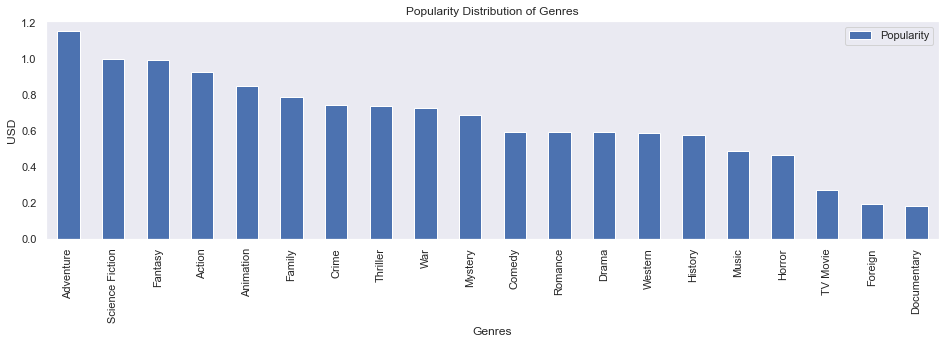

In [37]:
    df_genres_analysis=df_genres.groupby(['genres_lim']).mean()[['popularity']].sort_values(by='popularity',ascending=False)
    ax=df_genres_analysis.plot(kind='bar',figsize=(16, 4),ylabel='USD',xlabel='Genres', title='Popularity Distribution of Genres')
    labels = ['Popularity']
    ax.grid(False)
    ax.legend(labels);

From a **financial** standpoint, the best movies genres are:
*adventure*, *fantasy*, *action*, family and *science fiction* in that
order.  
However if we look at **popularity**, the best movie genres are
*adventure*, *science fiction*, *fantasy*, *action* and animation.  
This should give us an idea on the most successfull movie genres.

### Research Question 5 : Which production companies have the most success ?<a href="#Research-Question-5--:-Which-production-companies-have-the-most-success-?" class="anchor-link">¶</a>

We will deal with this variable similarly to the movies genres.

In [38]:
    df_prod_companies=df.dropna(subset=['production_companies'])
    df_prod_companies['prod_companies_lim']=df_prod_companies.production_companies.str.split("|")
    df_prod_companies=df_prod_companies.explode('prod_companies_lim')
    df_prod_companies.drop(['production_companies'], axis=1, inplace=True)
    df_prod_companies.head(3)

C:\Temp/ipykernel_3628/2793240547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_companies['prod_companies_lim']=df_prod_companies.production_companies.str.split("|")


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj,public_reception,prod_companies_lim
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09,Above Average,Universal Studios
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09,Above Average,Amblin Entertainment
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Summer,1.254446e+09,Above Average,Legendary Pictures


The below are the most **financially successful** companies.

In [39]:
    df_prod_companies.groupby(['prod_companies_lim']).mean()[['revenue_adj','gain_adj','popularity']].sort_values(by='revenue_adj',ascending=False)[:5]

,revenue_adj,gain_adj,popularity
prod_companies_lim,,,
Hoya Productions,2.167325e+09,2.128036e+09,2.010733
Truenorth Productions,1.902723e+09,1.718723e+09,11.173104
Alfran Productions,1.277914e+09,1.246626e+09,5.738034
Julia Phillips and Michael Phillips Productions,1.092965e+09,1.021009e+09,1.104816
Second Mate Productions,1.081672e+09,8.157552e+08,4.585692


The below are the companies giving us the most **popular** movies.

In [40]:
    df_prod_companies.groupby(['prod_companies_lim']).mean()[['revenue_adj','gain_adj','popularity']].sort_values(by='popularity',ascending=False)[:5]

,revenue_adj,gain_adj,popularity
prod_companies_lim,,,
Bulletproof Cupid,7.122911e+08,5.557057e+08,14.311205
Fuji Television Network,5.735000e+08,4.952746e+08,12.777401
DefyNite Films,7.252661e+07,5.410479e+07,11.422751
Truenorth Productions,1.902723e+09,1.718723e+09,11.173104
3Foot7,8.797523e+08,6.494795e+08,10.174599


The only common company is *Truenorth Productions*. What movies did it
produce ?

In [41]:
    df_prod_companies[df_prod_companies['prod_companies_lim']=='Truenorth Productions']

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_season,gain_adj,public_reception,prod_companies_lim
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Winter,1.718723e+09,Successful,Truenorth Productions


Since this is only one movie, it appears that our data was misleading.  
It appeared on both lists since we are calcuating our values on an
*average* basis and the company has produced one very successful movie.

### Research Question 6 : Does the budget affect the success of the movie ?<a href="#Research-Question-6--:-Does-the-budget-affect-the-success-of-the-movie-?" class="anchor-link">¶</a>

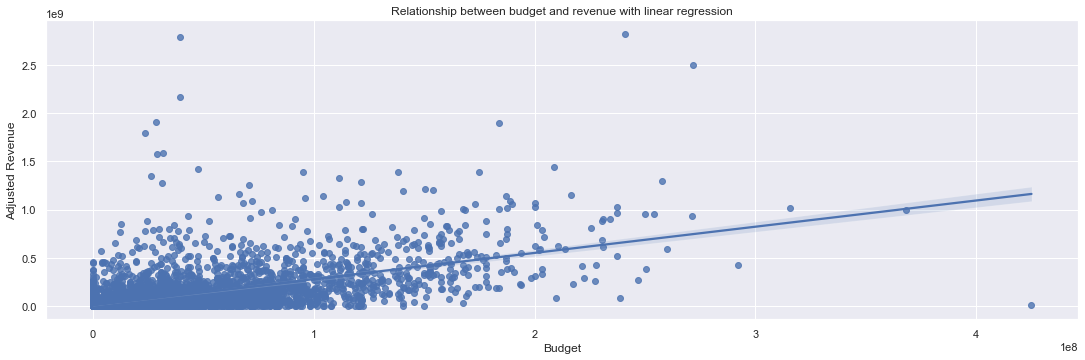

In [42]:
    df_budget=df.dropna(subset=['budget'])
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.regplot(x=df_budget.budget_adj, y=df_budget.revenue_adj, data=tips, ax=ax).set( xlabel = "Budget", ylabel = "Adjusted Revenue", title = 'Relationship between budget and revenue with linear regression');

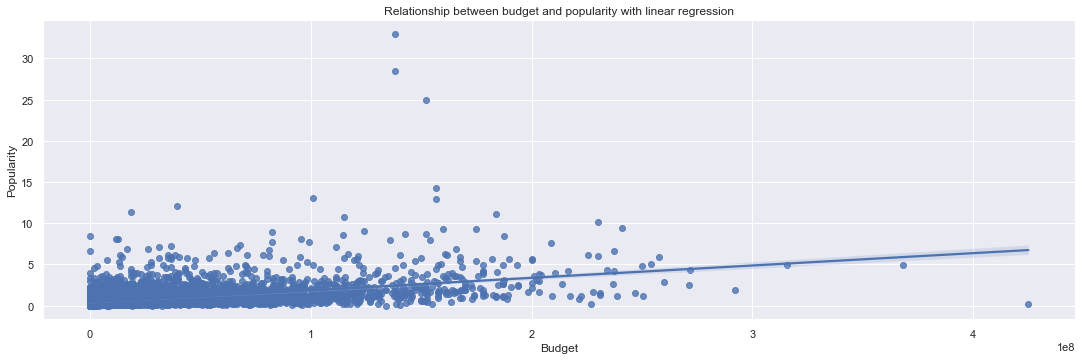

In [43]:
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.regplot(x=df_budget.budget_adj, y=df_budget.popularity, data=tips, ax=ax).set( xlabel = "Budget", ylabel = "Popularity", title = 'Relationship between budget and popularity with linear regression');

This is indeed bad news for the production companies.  
If you spend more, you are more likely to produce better movies.

### Research Question 7 : Is there a relationship between the runtime of a movie and its success ?<a href="#Research-Question-7--:-Is-there-a-relationship-between-the-runtime-of-a-movie-and-its-success-?" class="anchor-link">¶</a>

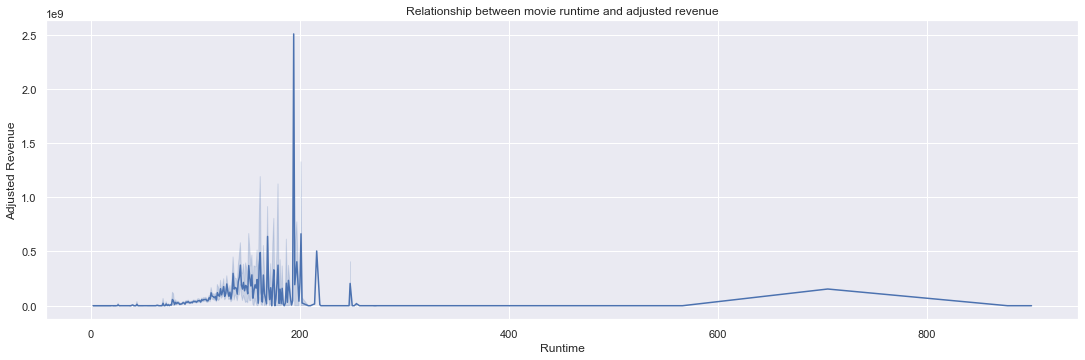

In [44]:
    df_runtime=df.drop(df.index[df['runtime']==0])
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.lineplot(x=df_runtime.runtime, y=df_runtime.revenue_adj,ax=ax).set( xlabel = "Runtime", ylabel = "Adjusted Revenue", title = 'Relationship between movie runtime and adjusted revenue');

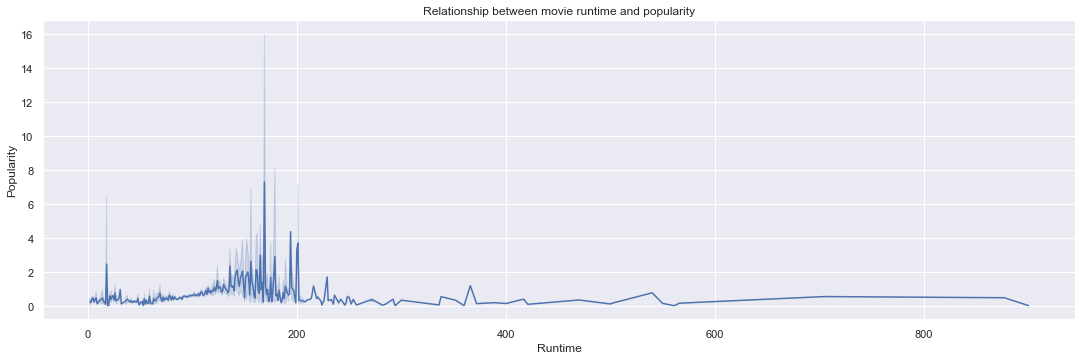

In [45]:
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.lineplot(x=df_runtime.runtime, y=df_runtime.popularity,ax=ax).set( xlabel = "Runtime", ylabel = "Popularity", title = 'Relationship between movie runtime and popularity');

Kind of expected, the most popular and successful movies are usually not
documentaries or short animation movies.  
You will find that the most popular and successful movies are in a hot
zone between the 2h-3h mark.

<span id="conclusions"></span>

## Conclusions<a href="#Conclusions" class="anchor-link">¶</a>

> We were able to check the relationship between **seven** different
> independant variables and the movie's success.  
> We defined the movies success based on *two* different criteria: its
> popularity score and its revenue adjusted for inflation.
>
> Most successful movies are in the summer, have high average votes and
> high budget. They are in the length of a normal movie. Older movies
> have gained more money but the newer ones are more popular.  
> The most successful genres are adventure, science fiction, fantasy and
> action.  
> We cannot determine a certain production company that has the *recipe
> for success*

So, as a conclusion, what is the relationship between movie popularity
and revenue ?

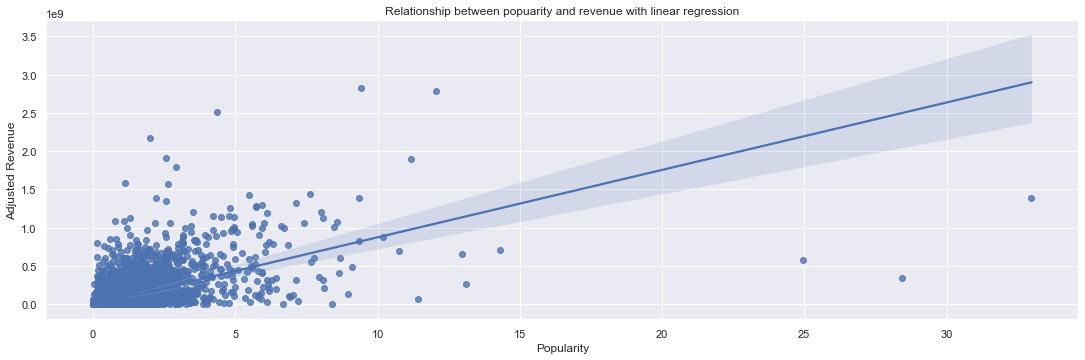

In [46]:
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 5.5)
    sns.regplot(x=df.popularity, y=df.revenue_adj, data=tips, ax=ax).set( xlabel = "Popularity", ylabel = "Adjusted Revenue", title = 'Relationship between popuarity and revenue with linear regression');

### Data Limitations

Although the data submitted to the project was extensive and helped us with our analysis, we have the following comments:

1. The missing values in different columns was of course a low light in the data which decreased the efficiency of the analysis.
2. Having data spanning over 50 years is interesting, but if we had extensive data over a decade or two would help us gather more insights on the successful actors and production companies, as very few ones can sustain a good status over this very long time period.
3. Having documentaries and short movies within the normal two-hour movies was not efficient, as those movies have a different audience and needed separate .

<span id="appendix"></span>

## Appendix<a href="#Appendix" class="anchor-link">¶</a>

> This area will include some other efforts to show different
> relationships between parameters in our datasets.  
> While they have no direct impact on our analysis, the appendix is
> added to complete the report.

The below heatmap shows the most popular months for the movie industry.

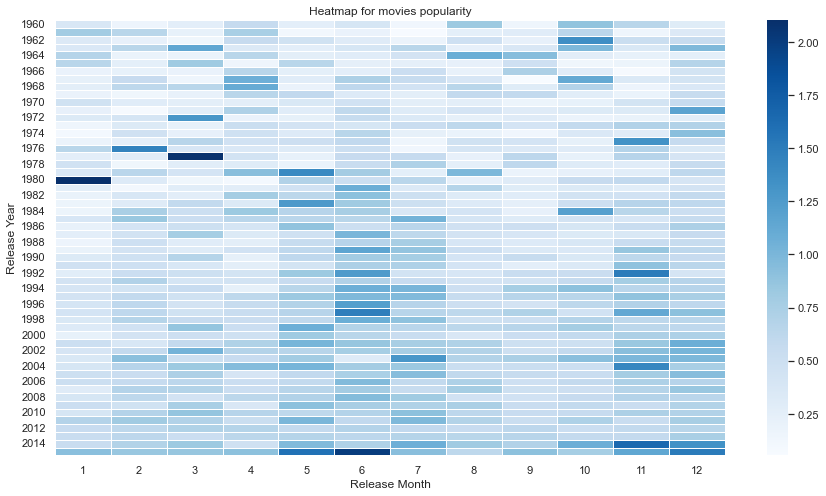

In [47]:
    sns.set_theme()
    result=pd.pivot_table(df,values='popularity', index='release_year', columns='release_month', fill_value=df.popularity.mean())
    f, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(result, linewidths=1, cmap="Blues", ax=ax).set( xlabel = "Release Month", ylabel = "Release Year", title = 'Heatmap for movies popularity');

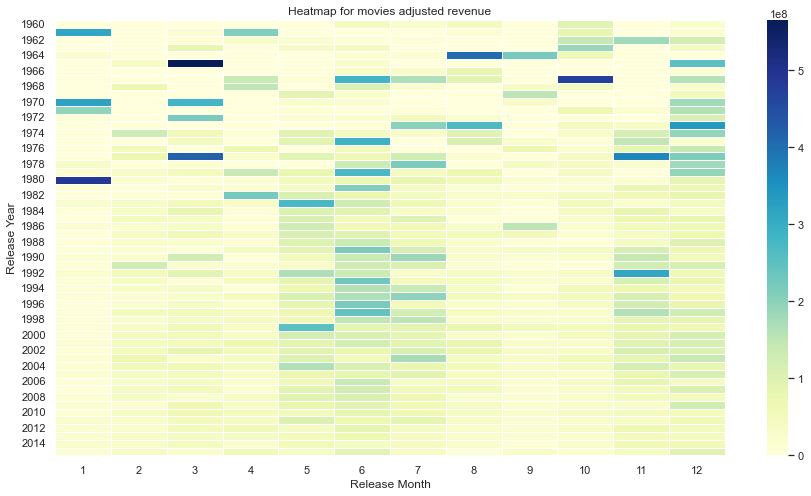

In [48]:
    sns.set_theme()
    result=pd.pivot_table(df,values='revenue_adj', index='release_year', columns='release_month', fill_value=df.popularity.mean())
    f, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(result, linewidths=1, cmap="YlGnBu" ,ax=ax).set( xlabel = "Release Month", ylabel = "Release Year", title = 'Heatmap for movies adjusted revenue');

The below is just to show the most popuplar genre in each year.  
The view is not perfect, but it will show us what we need.

In [49]:
    most_popular={}  
    for i in range(1960,2016):
        df_year=df[df['release_year']==i]
        df_year_genres=df_year
        df_year_genres['year_genres_lim']=df_year_genres['genres'].str.split("|")
        df_year_genres=df_year_genres.explode('year_genres_lim')
        df_year_genres_analysis=df_year_genres.groupby('year_genres_lim').mean()['popularity'].sort_values(ascending=False)
        #print(df_year_genres_analysis.index[0])
        #print(df_year_genres_analysis.values[0])
        most_popular.update({i:[df_year_genres_analysis.index[0],df_year_genres_analysis.values[0]]})
    df_most_popular=pd.DataFrame(most_popular, index = ['Genre','Popularity']).transpose()
    print(df_most_popular)

C:\Temp/ipykernel_3628/1987385382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_genres['year_genres_lim']=df_year_genres['genres'].str.split("|")


                Genre Popularity
1960         Thriller    0.81191
1961        Animation   2.631987
1962        Adventure   0.942513
1963        Animation    2.18041
1964              War   0.930959
1965            Music    0.96885
1966        Animation   0.585717
1967        Animation   1.348805
1968          Mystery   1.519456
1969            Crime    0.94802
1970        Animation   1.127719
1971           Family   1.530722
1972            Crime   1.072768
1973        Animation   0.956526
1974          Mystery   0.702035
1975        Adventure   0.880297
1976            Crime   0.707249
1977           Action   1.419319
1978            Music   0.679805
1979           Action   1.410014
1980  Science Fiction   0.897143
1981        Adventure   0.875815
1982              War   1.143182
1983        Adventure   0.900596
1984           Family   0.823924
1985           Family   0.924311
1986        Adventure   0.798935
1987          History   0.815643
1988           Action   0.599017
1989      

We see a recent move towards adventure, western and fantasy movies with
a retreat from animation movies.

In [50]:
    end = time.time()
    tot_time = end-start
    print('This report took {} seconds to generate'.format(tot_time))
    print('Thank you for taking time to read this report.')
    print('Hope it was useful and interesting.')

This report took 21.610376119613647 seconds to generate
Thank you for taking time to read this report.
Hope it was useful and interesting.
